In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", "{:.2f}".format)


In [2]:
DATA_DIR = Path("../data/processed")
DATA_FILE = DATA_DIR / "claims_denial_base.csv"

df = pd.read_csv(DATA_FILE)

print("Shape:", df.shape)
df.head()


Shape: (70000, 48)


,billing_id,patient_id_x,encounter_id,insurance_provider,payment_method,claim_id,claim_billing_date,billed_amount,paid_amount,claim_status,denial_reason,is_denied,first_name,last_name,dob,age,gender,ethnicity,insurance_type,marital_status,address,city,state,zip,phone,email_x,registration_date,patient_id_y,provider_id,visit_date,visit_type,department_x,reason_for_visit,diagnosis_code,admission_type,discharge_date,length_of_stay,status,readmitted_flag,name,department_y,specialty,npi,inhouse,location,years_experience,contact_info,email_y
0,BILL000001,PAT001464,ENC000001,BCBS,Insurance,CLM000001,06-02-2025 00:00,1971.52,0.00,Denied,Claim Billed to Wrong Payer,1,Traci,Tran,05-11-1948,76,Female,Asian,BCBS,Married,421 Victor Throughway Apt. 136,Long Beach,CA,90802.00,NaN,traci.tran860@example.com,19-01-2025,PAT001464,PRO00345,19-01-2025,Outpatient,Pulmonology,Asthma Follow-up,J45.909,NaN,NaN,NaN,Completed,No,Nancy Barber,Pulmonology,Pulmonologist,8515688546,Yes,CA,7,907 330 0119,nancy.barber@healthcare.org
1,BILL000002,PAT025832,ENC000002,Medicare,Insurance,CLM000002,01-05-2025 00:00,1243.80,736.05,Paid,NaN,0,Stephanie,Williams,04-04-1964,61,Female,Hispanic,Medicare,Married,080 Tran Plains Suite 209,Anaheim,CA,92801.00,932.766.1047,stephanie.williams717@example.com,30-03-2025,PAT025832,PRO00023,30-03-2025,Emergency,Emergency Department,Sudden Breathing Issue,R06.02,Emergency,NaN,NaN,Completed,No,Shawn Jones,Emergency Department,General Practitioner,4923548486,Yes,CA,8,409 806 0735,shawn.jones@healthcare.org
2,BILL000003,PAT055873,ENC000003,BCBS,Insurance,CLM000003,23-02-2025 00:00,4854.11,2676.12,Paid,NaN,0,Katie,Melendez,04-06-2021,4,Female,Asian,BCBS,Single,086 Chandler Points,Seattle,WA,98101.00,445 617 3534,katie.melendez409@example.com,18-01-2025,PAT055873,PRO01197,18-01-2025,Outpatient,Urology,Kidney Stone,N20.0,NaN,NaN,NaN,Completed,No,David Morrison,Urology,Urologist,8599764735,Yes,CA,17,359 740 7814,NaN
3,BILL000004,PAT048558,ENC000004,BCBS,Insurance,CLM000004,20-04-2025 00:00,2638.21,1861.39,Paid,NaN,0,Michael,Martin,10-03-2010,15,Female,Asian,BCBS,Single,607 Jacob Terrace Suite 998,Sacramento,CA,94203.00,305.948.4358,michael.martin299@example.com,21-03-2025,PAT048558,PRO00049,21-03-2025,Outpatient,Emergency Department,Severe Chest Pain,R07.9,NaN,NaN,NaN,Completed,No,Amy Jones,Emergency Department,General Practitioner,5067298284,Yes,CA,20,670 484 5671,amy.jones@healthcare.org
4,BILL000005,PAT018366,ENC000005,BCBS,Selfpay,NaN,NaN,1046.99,1046.99,Paid,NaN,0,Richard,Larson,26-07-1952,72,Female,White,BCBS,Married,4303 David Lodge,Fresno,CA,93701.00,+1 757 412 0,richard.larson934@example.com,24-01-2025,PAT018366,PRO00594,24-01-2025,Inpatients,Gastroenterology,IBS,K58.9,NaN,26-01-2025,2.00,Completed,No,Aaron Rich,Gastroenterology,Gastroenterologist,3057043847,Yes,CA,6,618 532 0882,aaron.rich@healthcare.org


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   billing_id          70000 non-null  object 
 1   patient_id_x        70000 non-null  object 
 2   encounter_id        70000 non-null  object 
 3   insurance_provider  70000 non-null  object 
 4   payment_method      70000 non-null  object 
 5   claim_id            59638 non-null  object 
 6   claim_billing_date  59638 non-null  object 
 7   billed_amount       70000 non-null  float64
 8   paid_amount         70000 non-null  float64
 9   claim_status        70000 non-null  object 
 10  denial_reason       5998 non-null   object 
 11  is_denied           70000 non-null  int64  
 12  first_name          70000 non-null  object 
 13  last_name           70000 non-null  object 
 14  dob                 70000 non-null  object 
 15  age                 70000 non-null  int64  
 16  gend

In [4]:
missing_summary = (
    df.isnull()
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

missing_summary.columns = ["column", "missing_ratio"]
missing_summary.head(15)


,column,missing_ratio
0,denial_reason,0.91
1,admission_type,0.69
2,length_of_stay,0.65
3,discharge_date,0.65
4,email_y,0.21
5,email_x,0.20
6,claim_id,0.15
7,claim_billing_date,0.15
8,phone,0.10
9,address,0.10


In [5]:
df["is_denied"].value_counts()


is_denied
0    64002
1     5998
Name: count, dtype: int64

In [6]:
df["is_denied"].value_counts(normalize=True) * 100

is_denied
0   91.43
1    8.57
Name: proportion, dtype: float64

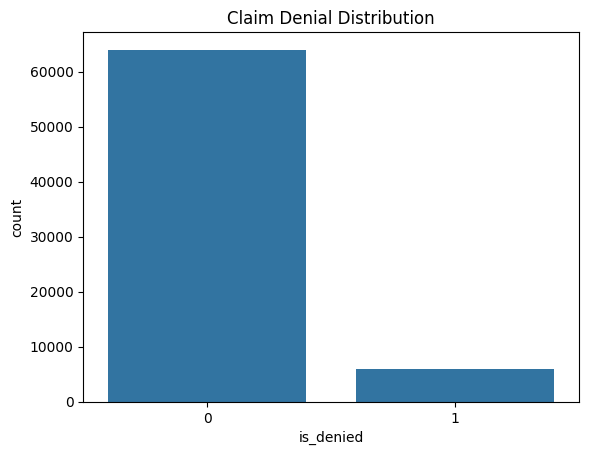

In [7]:
sns.countplot(data=df, x="is_denied")
plt.title("Claim Denial Distribution")
plt.show()


In [8]:
df.describe()


,billed_amount,paid_amount,is_denied,age,zip,length_of_stay,npi,years_experience
count,70000.00,70000.00,70000.00,70000.00,63028.00,24345.00,70000.00,70000.00
mean,1612.87,1040.65,0.09,47.01,92200.12,2.50,5480337678.01,12.43
std,2047.36,1478.71,0.28,25.17,4423.13,0.50,2569041292.56,8.50
min,100.07,0.00,0.00,4.00,75001.00,2.00,1007673737.00,1.00
25%,697.05,366.57,0.00,25.00,90802.00,2.00,3167117159.00,6.00
50%,1214.11,755.78,0.00,47.00,93301.00,2.00,5392847302.00,11.00
75%,2090.12,1357.89,0.00,69.00,94203.00,3.00,7635834372.00,17.00
max,38191.35,38191.35,1.00,90.00,98101.00,3.00,9992323596.00,40.00


In [9]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))

numeric_cols, categorical_cols


Numeric columns: 8
Categorical columns: 40


(['billed_amount',
  'paid_amount',
  'is_denied',
  'age',
  'zip',
  'length_of_stay',
  'npi',
  'years_experience'],
 ['billing_id',
  'patient_id_x',
  'encounter_id',
  'insurance_provider',
  'payment_method',
  'claim_id',
  'claim_billing_date',
  'claim_status',
  'denial_reason',
  'first_name',
  'last_name',
  'dob',
  'gender',
  'ethnicity',
  'insurance_type',
  'marital_status',
  'address',
  'city',
  'state',
  'phone',
  'email_x',
  'registration_date',
  'patient_id_y',
  'provider_id',
  'visit_date',
  'visit_type',
  'department_x',
  'reason_for_visit',
  'diagnosis_code',
  'admission_type',
  'discharge_date',
  'status',
  'readmitted_flag',
  'name',
  'department_y',
  'specialty',
  'inhouse',
  'location',
  'contact_info',
  'email_y'])

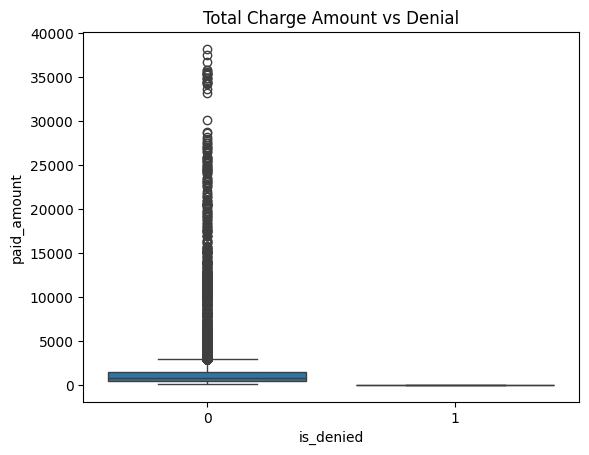

In [10]:
sns.boxplot(data=df, x="is_denied", y="paid_amount")
plt.title("Total Charge Amount vs Denial")
plt.show()


In [11]:
provider_denial = (
    df.groupby("provider_id")["is_denied"]
      .mean()
      .sort_values(ascending=False)
)

provider_denial.head(10)


provider_id
PRO01425   0.32
PRO01431   0.29
PRO01158   0.24
PRO01082   0.24
PRO01031   0.24
PRO00533   0.24
PRO00711   0.23
PRO01484   0.23
PRO01085   0.23
PRO01388   0.22
Name: is_denied, dtype: float64

In [12]:
procedure_denial = (
    df.groupby("diagnosis_code")["is_denied"]
      .mean()
      .sort_values(ascending=False)
)

procedure_denial.head(10)


diagnosis_code
Z11.1     0.12
F41.9     0.11
N39.0     0.10
K21.9     0.10
Z51.11    0.10
M25.561   0.10
I20.9     0.10
M19.90    0.10
Z12.11    0.10
R05       0.10
Name: is_denied, dtype: float64

In [13]:
date_cols = [col for col in df.columns if "date" in col.lower()]
date_cols


['claim_billing_date', 'registration_date', 'visit_date', 'discharge_date']

In [14]:
corr = df[numeric_cols].corr()["is_denied"].sort_values(ascending=False)
corr


is_denied           1.00
npi                -0.00
billed_amount      -0.00
zip                -0.00
age                -0.00
length_of_stay     -0.00
years_experience   -0.00
paid_amount        -0.22
Name: is_denied, dtype: float64

### Key EDA Observations

- Denial rate is moderately imbalanced
- Claim amount shows clear separation between denied vs approved claims
- Provider and procedure codes exhibit strong denial patterns
- Several columns contain missing values requiring imputation
- Date fields need careful handling to prevent leakage

Next step:
→ Feature creation & transformation in `02_feature_engineering.ipynb`
